In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
df = pd.read_csv("data.csv")

In [21]:
df.head(10)

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7
5,0.02,10,40,honeycomb,200,60,40,pla,0,60,24,1.1
6,0.02,5,10,grid,205,65,40,pla,25,55,12,1.3
7,0.02,10,10,honeycomb,210,70,40,pla,50,21,14,1.5
8,0.02,9,70,grid,215,75,40,pla,75,24,27,1.4
9,0.02,8,40,honeycomb,220,80,40,pla,100,30,25,1.7


One Hot Encoding the Catagorical Features

In [22]:
df['infill_pattern'].replace(['grid','honeycomb'], [0,1], inplace = True)
df['material'].replace(['abs','pla'], [0,1], inplace = True)

Heatmap

<AxesSubplot:>

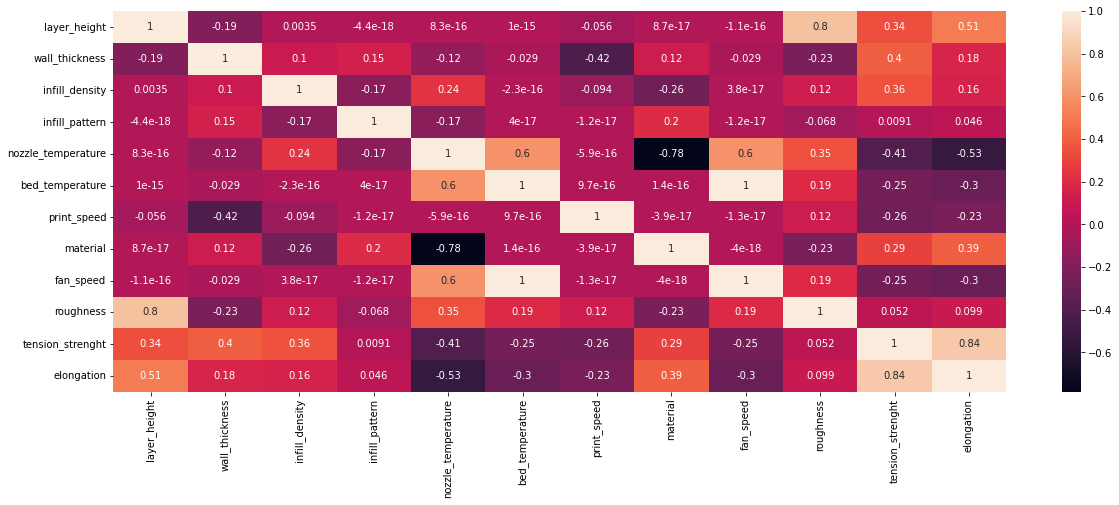

In [23]:
plt.figure(figsize = (20,7))
sns.heatmap(df.corr(), annot = True, )

In [24]:
X = df.drop(['roughness','tension_strenght','elongation'], axis = 1)
y = df['roughness']

In [25]:
X.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed
0,0.02,8,90,0,220,60,40,0,0
1,0.02,7,90,1,225,65,40,0,25
2,0.02,1,80,0,230,70,40,0,50
3,0.02,4,70,1,240,75,40,0,75
4,0.02,6,90,0,250,80,40,0,100


So the EDA Ends
Now we can test various models on this dataset.

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

Cross Validation Score:
For cross validation, I am adopting Linear Regression, Lasso, ElasticNet ( Just wanted to see so..), DecisionTreeRegressor and Ridge

In [27]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

In [28]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=120)

Result of Linear Regression

In [29]:
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.87363558, 0.79939722, 0.68558791, 0.88311902, 0.77733434])

Result of Lasso

In [30]:
cross_val_score(Lasso(), X, y, cv=cv)

array([0.70363214, 0.66141902, 0.48462008, 0.76300276, 0.84108628])

Result of Decision Tree Regressor

In [31]:
cross_val_score(DecisionTreeRegressor(), X, y, cv=cv)

array([0.83409166, 0.75943799, 0.25698824, 0.47555614, 0.57943892])

Result of Elastic net

In [32]:
cross_val_score(ElasticNet(), X, y, cv=cv)

array([-0.74276523, -0.25428957, -1.06701884, -0.26680806,  0.26698976])

Result of Ridge

In [33]:
cross_val_score(Ridge(), X, y, cv=cv)

array([-0.42034921, -0.02191544, -0.85988897, -0.07524959,  0.42469227])

Summary
So far with the existing wrangled data we can catagorise : Linear Regression > Decision Tree> Lasso

Going With Decision Tree

In [34]:
dreg = DecisionTreeRegressor()
dreg.fit(X_train,y_train)
dreg.score(X_test,y_test)

0.9644635730374411

Going With Linear Regression

In [35]:
lreg = LinearRegression()
lreg.fit(X_train,y_train)
lreg.score(X_test,y_test)

0.855873209794428